In [1]:
# Code attribution: Yiyin Shen, Tyler Caraza-Harter
# Imports
import sklearn
import sklearn.decomposition
import sklearn.impute
import geopandas
import pandas
import shapely
import numpy
import matplotlib.pyplot as plt

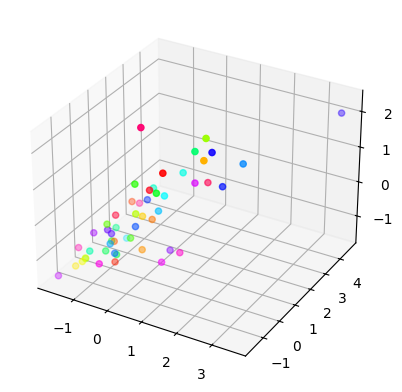

In [2]:
# Read the US Map and the data
# Same as the code in the previous two lectures
map = geopandas.read_file("cb_2018_us_state_20m.zip")
data = pandas.read_csv("SASUMMARY__ALL_AREAS_1998_2022.csv")
sub = data.pivot(index = "GeoName", columns = "LineCode", values = "2021")
sub["NAME"] = sub.index
combined = map.merge(sub, how = "left", on = "NAME")[["NAME", "geometry", 11, 12, 13]]
features = combined[[11, 12, 13]]
impute = sklearn.impute.SimpleImputer(strategy = "mean")
impute.fit(features)
full = impute.transform(features)
scale = sklearn.preprocessing.StandardScaler()
scale.fit(full)
x = scale.transform(full)
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c = range(len(x)), cmap = "hsv")

In [3]:
# Compute the first two principal components
pca = sklearn.decomposition.PCA(n_components = 2)
pca.fit(x)
pca.components_

array([[ 0.58589369,  0.59271993,  0.55264063],
       [-0.45500855, -0.3237046 ,  0.82956769]])

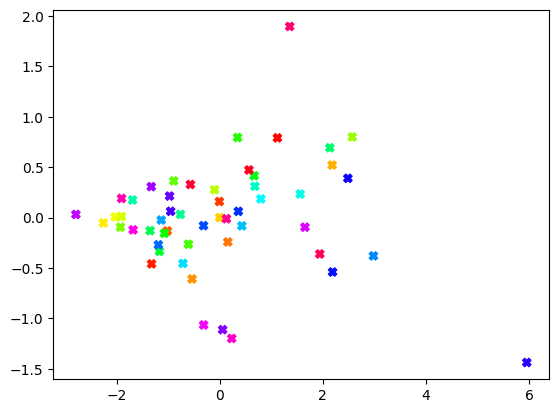

In [4]:
# Transform the points to the lower dimensional space
y = pca.transform(x)
plt.scatter(y[:, 0], y[:, 1], c = range(len(x)), cmap = "hsv", marker = "X")

In [5]:
# Test the algebra to compute the reconstruct
y_pred = x @ numpy.transpose(pca.components_)
numpy.hstack([y_pred, y])[:10, :]

array([[ 1.11849335e+00,  7.90188450e-01,  1.11849335e+00,
         7.90188450e-01],
       [-1.32381819e+00, -4.59203026e-01, -1.32381819e+00,
        -4.59203026e-01],
       [-7.93548442e-03,  1.59263152e-01, -7.93548442e-03,
         1.59263152e-01],
       [-1.01916656e+00, -1.32061019e-01, -1.01916656e+00,
        -1.32061019e-01],
       [ 1.56237549e-01, -2.41799439e-01,  1.56237549e-01,
        -2.41799439e-01],
       [-5.37849944e-01, -6.08897524e-01, -5.37849944e-01,
        -6.08897524e-01],
       [ 2.18061836e+00,  5.20600946e-01,  2.18061836e+00,
         5.20600946e-01],
       [-1.03428292e-16,  2.50951602e-15,  1.07171798e-16,
         5.22873100e-16],
       [-2.25932221e+00, -5.36978926e-02, -2.25932221e+00,
        -5.36978926e-02],
       [-2.03105861e+00,  6.91488690e-03, -2.03105861e+00,
         6.91488690e-03]])

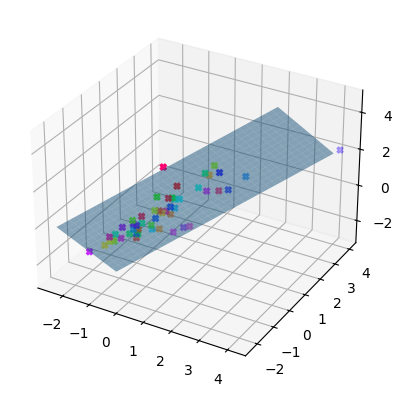

In [6]:
# Reconstruct the items and plot them
x_pred = y @ pca.components_ + pca.mean_
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter(x_pred[:, 0], x_pred[:, 1], x_pred[:, 2], c = range(len(x)), cmap = "hsv", marker = "X")
x0, y0 = numpy.meshgrid(numpy.arange(min(y[:, 0]), max(y[:, 0]), 0.25), numpy.arange(min(y[:, 1]), max(y[:, 1]), 0.25))
x1 = x0 * pca.components_[0, 0] + y0 * pca.components_[1, 0] + pca.mean_[0]
y1 = x0 * pca.components_[0, 1] + y0 * pca.components_[1, 1] + pca.mean_[1]
z1 = x0 * pca.components_[0, 2] + y0 * pca.components_[1, 2] + pca.mean_[2]
ax.plot_surface(x1, y1, z1, alpha = 0.5)

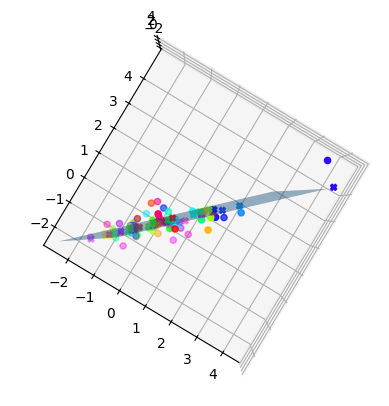

In [7]:
# Compare the reconstruction and the original points
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c = range(len(x)), cmap = "hsv")
ax.scatter(x_pred[:, 0], x_pred[:, 1], x_pred[:, 2], c = range(len(x)), cmap = "hsv", marker = "X")
ax.plot_surface(x1, y1, z1, alpha = 0.5)
ax.view_init(90)